In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from numpy import log
import pandas as pd
import os
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf

In [3]:
#12

In [38]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

df = pd.read_csv('2010_zip_4_monthly_data.csv', names=['value'], header=0)

model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=927.804, BIC=938.920, Time=0.360 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1000.604, BIC=1006.162, Time=0.045 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=942.170, BIC=950.507, Time=0.197 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=928.083, BIC=936.420, Time=0.153 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=998.674, BIC=1001.453, Time=0.025 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=926.214, BIC=940.109, Time=0.372 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=937.921, BIC=949.038, Time=0.242 seconds
Fit ARIMA: (3, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=928.095, BIC=944.770, Time=0.468 seconds
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=929.990, BIC=946.665, Time=0.961 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=927.488, BIC=941.383, Time=0.331 s

In [20]:
# 13

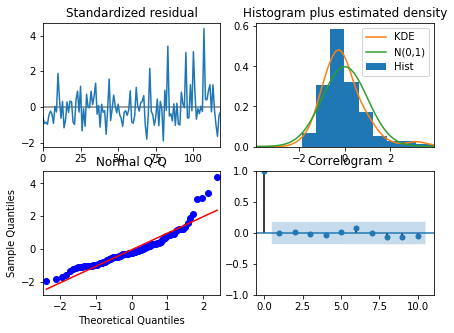

In [39]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

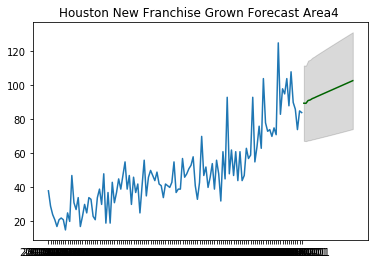

In [40]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Houston New Franchise Grown Forecast Area4 ")
plt.show()

In [41]:
confint

array([[ 67.36283772, 111.68475812],
       [ 67.22788791, 111.66909962],
       [ 67.62126193, 114.56576048],
       [ 67.80351916, 115.09402641],
       [ 68.19580088, 116.29696104],
       [ 68.46726632, 117.0209436 ],
       [ 68.79659395, 117.91070193],
       [ 69.09545871, 118.69038404],
       [ 69.41081878, 119.50943313],
       [ 69.72043129, 120.30108899],
       [ 70.03588444, 121.10073911],
       [ 70.35160764, 121.89226413],
       [ 70.67039725, 122.68412775],
       [ 70.99083262, 123.47247618],
       [ 71.31355674, 124.25937005],
       [ 71.63817979, 125.04391863],
       [ 71.96482117, 125.82665254],
       [ 72.29334873, 126.60739342],
       [ 72.62375687, 127.38630332],
       [ 72.95597975, 128.16337285],
       [ 73.28998392, 128.93867314],
       [ 73.62572242, 129.71223295],
       [ 73.96315741, 130.4840992 ],
       [ 74.30224885, 131.2543075 ]])

In [24]:
#14

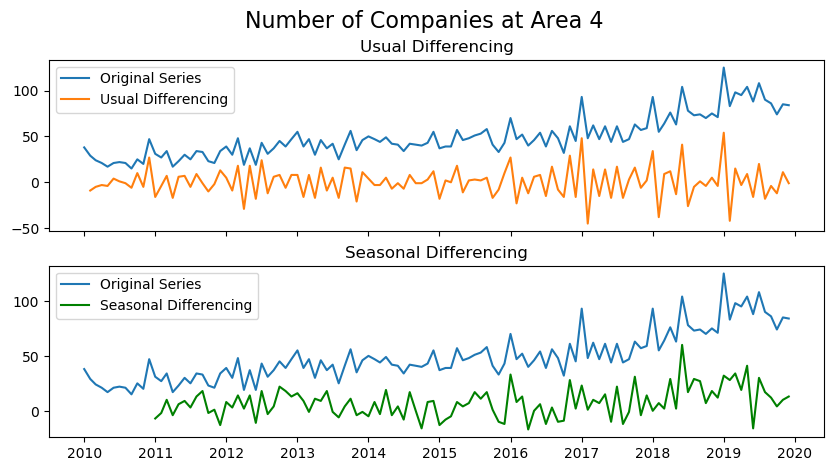

In [42]:
# Import
data = pd.read_csv('2010_zip_4_monthly_data.csv', parse_dates=['date'], index_col='date')

# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Number of Companies at Area 4', fontsize=16)
plt.show()

In [43]:
# !pip3 install pyramid-arima
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=839.673, BIC=853.083, Time=3.277 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=True); AIC=872.282, BIC=877.646, Time=0.037 seconds
Fit ARIMA: (1, 0, 0)x(1, 1, 0, 12) (constant=True); AIC=866.844, BIC=877.572, Time=0.845 seconds
Fit ARIMA: (0, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=863.575, BIC=874.303, Time=0.810 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=False); AIC=900.058, BIC=902.740, Time=0.029 seconds
Fit ARIMA: (1, 0, 1)x(0, 1, 0, 12) (constant=True); AIC=866.472, BIC=877.200, Time=0.633 seconds
Fit ARIMA: (1, 0, 1)x(1, 1, 1, 12) (constant=True); AIC=841.649, BIC=857.742, Time=2.700 seconds
Fit ARIMA: (1, 0, 1)x(0, 1, 2, 12) (constant=True); AIC=844.427, BIC=860.520, Time=8.359 seconds
Fit ARIMA: (1, 0, 1)x(1, 1, 0, 12) (constant=True); AIC=849.918, BIC=863.328, Time=1.877 seconds
Fit ARIMA: (1, 0, 1)x(1, 1, 2, 12) (constant=True); AIC=850.574, BIC=869.349, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  120
Model:             SARIMAX(2, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -411.933
Date:                            Sun, 29 Mar 2020   AIC                            835.866
Time:                                    23:01:24   BIC                            851.958
Sample:                                         0   HQIC                           842.391
                                            - 120                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5110      0.480      1.065      0.287      -0.430       1.452
ar.L1          0.6337      0.164      3.863      0.000       0.312       0.955
ar.L2          0.2917      0.134      2.172      0.030       0.028       0.555
ma.L1         -0.6381      0.144     -4.429      0.000      -0.920      -0.356
ma.S.L12      -0.6471      0.088     -7.379      0.000      -0.819      -0.475
sigma2       113.2540     14.884      7.609      0.000      84.081     142.427
===================================================================================
Ljung-Box (Q):                       19.27   Jarque-Bera (JB):                 9.22
Prob(Q):                              1.00   Prob(JB):                         0.01
Heteroskedasticity (H):               2.41   Skew:                             0.59
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

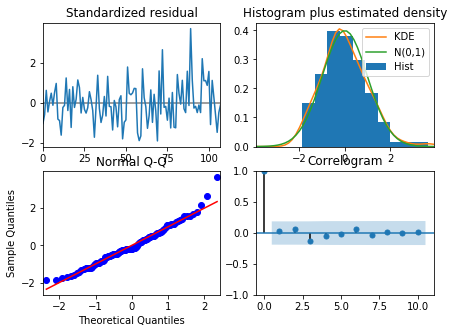

In [44]:
smodel.plot_diagnostics(figsize=(7,5))
plt.show()

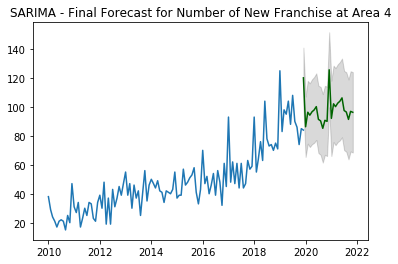

In [45]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast for Number of New Franchise at Area 4")
plt.show()

In [46]:
confint

array([[ 99.26599545, 140.98451021],
       [ 65.43770208, 107.15659471],
       [ 74.63432837, 118.05944964],
       [ 72.26601817, 116.34870758],
       [ 74.21415372, 119.07565261],
       [ 75.18242957, 120.66440448],
       [ 77.20643001, 123.25046125],
       [ 68.15814168, 114.69128839],
       [ 66.8869325 , 113.8522097 ],
       [ 61.5437369 , 108.88957179],
       [ 66.90637737, 114.58816801],
       [ 66.0545311 , 114.03310936],
       [ 99.75251503, 151.63623859],
       [ 66.05343975, 118.14735743],
       [ 75.75047839, 128.56963101],
       [ 73.56168549, 126.82851957],
       [ 75.72611265, 129.43947838],
       [ 76.86877426, 130.96091565],
       [ 79.05285261, 133.48400697],
       [ 70.14628937, 124.87588371],
       [ 69.00250487, 123.99650125],
       [ 63.77374555, 119.0016997 ],
       [ 69.23953135, 124.67470157],
       [ 68.48082116, 124.09965138]])

In [47]:
#15

In [48]:
# Import Data
data = pd.read_csv('2010_zip_4_monthly_data.csv', parse_dates=['date'], index_col='date')

In [49]:
# Compute Seasonal Index
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# multiplicative seasonal component
result_mul = seasonal_decompose(data['value'][-36:],   # 3 years
                                model='multiplicative', 
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# merge with the base data
data['month'] = data.index.month
df = pd.merge(data, seasonal_index, how='left', on='month')
df.columns = ['value', 'month', 'seasonal_index']
df.index = data.index  # reassign the index.

In [50]:
import pmdarima as pm

# SARIMAX Model
sxmodel = pm.auto_arima(df[['value']], exogenous=df[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=841.673, BIC=857.766, Time=2.884 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=True); AIC=874.282, BIC=882.328, Time=0.114 seconds
Fit ARIMA: (1, 0, 0)x(1, 1, 0, 12) (constant=True); AIC=868.844, BIC=882.255, Time=1.036 seconds
Fit ARIMA: (0, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=865.575, BIC=878.985, Time=1.405 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=False); AIC=902.058, BIC=907.422, Time=0.257 seconds
Fit ARIMA: (1, 0, 1)x(0, 1, 0, 12) (constant=True); AIC=868.472, BIC=881.883, Time=0.827 seconds
Fit ARIMA: (1, 0, 1)x(1, 1, 1, 12) (constant=True); AIC=843.649, BIC=862.424, Time=3.094 seconds
Fit ARIMA: (1, 0, 1)x(0, 1, 2, 12) (constant=True); AIC=844.249, BIC=863.024, Time=10.334 seconds
Fit ARIMA: (1, 0, 1)x(1, 1, 0, 12) (constant=True); AIC=851.918, BIC=868.011, Time=2.344 seconds
Fit ARIMA: (1, 0, 1)x(1, 1, 2, 12) (constant=True); AIC=852.575, BIC=874.033, Time

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  120
Model:             SARIMAX(2, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -411.933
Date:                            Sun, 29 Mar 2020   AIC                            837.866
Time:                                    23:04:11   BIC                            856.640
Sample:                                01-01-2010   HQIC                           845.478
                                     - 12-01-2019                                         
Covariance Type:                              opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          0.5110      0.489      1.045      0.296      -0.447       1.469
seasonal_index    -0.0001   5.81e+04  -2.04e-09      1.000   -1.14e+05    1.14e+05
ar.L1              0.6338      0.164      3.854      0.000       0.311       0.956
ar.L2              0.2917      0.134      2.172      0.030       0.028       0.555
ma.L1             -0.6381      0.146     -4.381      0.000      -0.924      -0.353
ma.S.L12          -0.6471      0.088     -7.378      0.000      -0.819      -0.475
sigma2           113.2544     15.083      7.509      0.000      83.692     142.817
===================================================================================
Ljung-Box (Q):                       19.27   Jarque-Bera (JB):                 9.22
Prob(Q):                              1.00   Prob(JB):                         0.01
Heteroskedasticity (H):               2.41   Skew:                             0.59
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""